In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA, KernelPCA

sns.set_theme()

In [2]:
X_train = pd.read_csv("../data/train_values.csv")
y_train = pd.read_csv("../data/train_labels.csv")

In [3]:
geo_cols = [col for col in X_train.columns if col.startswith("geo")]
X_geo = X_train[geo_cols]
print(X_geo.columns)

Index(['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id'], dtype='object')


geo_level_1: district  
geo_level_2: municipality  
geo_level_3: ward

In [4]:
for column in geo_cols:
    print(np.unique(X_geo[column]))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30]
[   0    1    3 ... 1425 1426 1427]
[    0     1     3 ... 12564 12565 12567]


There are 31 districts, 1428 municipalities and 12567 wards.

### Dimensionality Reduction with PCA

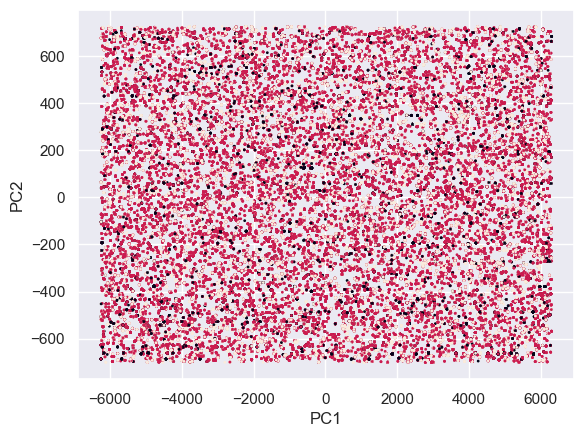

In [5]:
x_new = PCA(n_components=2).fit_transform(X_geo)
plt.scatter(x_new[:, 0], x_new[:, 1], s=1, c=y_train["damage_grade"])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

Dimensionality reduction from 3 to 2 with PCA did not lead to any structure being shown in the scatterplot.

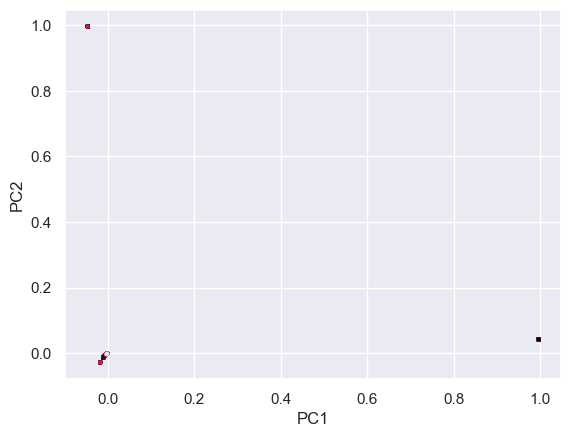

In [6]:
total_rows = X_geo.shape[0]
fraction_size = int(total_rows * 0.2)
X_geo_fraction = X_geo[0:fraction_size]
y_train_fraction = y_train[0:fraction_size]
x_new = KernelPCA(n_components=2, kernel="rbf").fit_transform(X_geo_fraction)
plt.scatter(x_new[:, 0], x_new[:, 1], s=5, c=y_train_fraction["damage_grade"])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

Kernel PCA initially failed with a memory error so I reduced the dataset to 20% of the data. I tried out the kernel methods sigmoid, cosine, poly and rbf to see if one of those could transform the three clumns to two in a way that showed a meaningful representation in regard to the target variable, but this was not the case

### Check feature selection

In [7]:
from sklearn.feature_selection import mutual_info_classif

mutual_info_classif(X_geo, y_train["damage_grade"])

array([0.13257415, 0.23399834, 0.29691198])

The 3rd level of geo_ids (ward) has the highest mutual information score.

In [13]:
for column in X_geo:
    print(X_geo[column].value_counts().describe())

count       31.000000
mean      8406.483871
std       7922.972472
min        265.000000
25%       2503.000000
50%       4332.000000
75%      14728.500000
max      24381.000000
Name: count, dtype: float64
count    1414.000000
mean      184.300566
std       259.928137
min         1.000000
25%        27.000000
50%       120.500000
75%       256.000000
max      4038.000000
Name: count, dtype: float64
count    11595.000000
mean        22.475291
std         29.507407
min          1.000000
25%          5.000000
50%         14.000000
75%         30.000000
max        651.000000
Name: count, dtype: float64


There are 31 district. The most frequent district occurs 24381 times, the least frequent district 265 times.  
The 1414 municipalities occur between 1 and 4038 times. The 11595 wards occurs between 1 and 615 times.  
Therefore for feature selection, just using the ward might be too finegranular.